# **TEAM ALLOCATION SIMULATOR - FDAE Team 4** #

Team members information:  
Nguyen Xuan Hoang - hoang013@e.ntu.edu.sg\
Lai SiZhu - la0001hu@e.ntu.edu.sg\
Guntaphon Akwatanakun gunt0005@e.ntu.edu.sg\
Alicia Ong (Wang Huimin) - alic0034@e.ntu.edu.sg

## **I. Overview of the problem:**
The problem requires us to:
- Analyse the `records.csv` file.
- Create an algorithm to allocate students and return a `.csv` file with the student's allocated groups.
- Evaluate our algorithm.

The criterias for our algorithm:
- No gender, CGPA level, or school majority in an allocated group.

In the sorting criterias, we see that gender can be split into 2 categories: Male and Female and CGPA level can be somewhat split into 3 basic categories: Low CGPA, Medium CGPA, and High CGPA, but there are many type of schools. Moreover, the number of schools far exceeds the number of members in the teams ($5$ members per team) so there are much more combinations of school that would ensure diversity compared to gender of CGPA level. Thus, our sorting algorithm would first optimise for Gender and CGPA, then we change some members in the allocated groups to satisfy the school diversity criteria.

We divide the problem into 6 subparts to solve:
1. Read `records.csv` and return the student's information as an analysable data structure.
2. Analyse the `records.csv` file.
3. Allocate the students within a tutorial group into subgroups based on gender and CGPA diversity.
4. Re-allocating the groups to enhance school diversity.
5. Write the output as a `.csv` file.
6. Analyse the output `.csv` file.

Since we can only allocate teams inside their tutorial groups, we modularise the code for Part 3 and Part 4 to allocate members of a tutorial group into their subgroups by making functions with the parameter being the list of students in that tutorial group. Afterwards, we apply the functions we made in Part 3 and Part 4 for every tutorial group in Part 5 to allocate students and write our output file.

## **II. Solving the problem:**

### **1. Read `records.csv` and return the student's information as an analysable data structure:**

We read the file and convert each line (each student's information) into a dictionary*. The output will be a dictionary with the `key:value` pair as their tutorial group number and a list of all members with the dictionary that has the student's info inside that. We do this with **4** steps:

**Step 1:** Read `records.csv`. \
Open the file using Python’s built-in file I/O. The file contains student information in the following format: tutorial_group, student_id, school, name, gender, cgpa. \
We skip the header row and process each remaining line.

**Step 2:** Convert each line into a dictionary. \
Each line represents one student. We split the line by the comma (`,`) and convert it into a dictionary.

**Step 3:** Gather all student dictionaries into a single list. \
Every converted dictionary from Step 2 is appended into one big list called `'students'`.

**Step 4:** Rearrange the list into a dictionary grouped by tutorial group. \
We create a new dictionary where the key is the tutorial group and the value is a list of all students belonging to that tutorial group.

###### *The reason why we contain every student's information as a dictionary, not a tuple is because it is easier to add in their allocated group's information with the existing student's information as a `key:value` pair.

This is the **pseudocode** and **flowchart** of this part:

**Pseudocode:**

*START*

*OPEN* file "record.csv" \
&nbsp;&nbsp;&nbsp;&nbsp;*READ* 1 line to skip header \
&nbsp;&nbsp;&nbsp;&nbsp;*SET* empty list called "students" 

*FOR* line in file \
&nbsp;&nbsp;&nbsp;&nbsp;*READ* 1 line \
&nbsp;&nbsp;&nbsp;&nbsp;*CONVERT* line into dictionary that contain student's information \
&nbsp;&nbsp;&nbsp;&nbsp;*APPEND* dictionary into students \
*ENDFOR* 

*SET* empty dictionary called "groups" 

*FOR* stu in students \
&nbsp;&nbsp;&nbsp;&nbsp;*GET* tutorial_group from stu \
&nbsp;&nbsp;&nbsp;&nbsp;*IF* tutorial_group not in groups THEN \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*CREATE* key: tutorial_group, value: [ ] \
&nbsp;&nbsp;&nbsp;&nbsp;*ENDIF* \
&nbsp;&nbsp;&nbsp;&nbsp;*APPEND* stu into groups["tutorial_group"] \
*ENDFOR* 

*RETURN* groups 

*END* 

**Flowchart:**

<img src="assets/Flowchart of Part 1.jpg" width="500" height="1000">

The code below is the **Python code** for part **1.**:

In [192]:
#Functions to read the files.
"""
Convert each line into dictionary like:
{
     "tutorial_group": "G-1",
     "student_id": "U1234567X",
     "school": "SCSE",
     "name": "Zone",
     "gender": "M",
     "cgpa": 4.23
   }
"""
#Function to convert each line to dictionary
def ConvertToDict(line):
    #split line into list with ","
    lists = line.strip().split(",")

    #return dictionary
    return{
        "tutorial_group" : lists[0],
        "student_id" : lists[1],
        "school" : lists[2],
        "name" : lists[3],
        "gender" : lists[4],
        "cgpa" : float(lists[5])
    }

#Function to append each dictionary to 1 big list
def OneBigList(data):
    #create 1 big list
    students = []

    #read each line from file
    with open(data, "r", encoding="utf-8") as file:
        #skip header
        header = file.readline().strip()

        #read each line and append to students
        for line in file:
            line = line.strip()
            students.append(ConvertToDict(line))
    return students

#Function to gather same tut group in 1 dictionary with key = tut no.
def GroupByTut(students):
    #create dictionary
    groups = {}

    #d is dictionary
    for d in students:
        #assign tut no.
        tutno = d["tutorial_group"]

        #check tutno in groups
        if tutno not in groups:
            #create key in groups
            groups[tutno] = []
        
        #append data into groups(list)
        groups[tutno].append(d)

    #return big dictionary
    return groups

#Combining functions
def readfile():
    students = OneBigList("assets/records.csv")
    groups = GroupByTut(students)
    return groups

In [193]:
#Executable code:
groups = readfile()

### **2. Analyse the `records.csv` file:**

We analyze the data we collected from `records.csv` to understand the characteristics of each tutorial group. This is to identify any potential imbalances in gender, CGPA, and school representation before doing any subgroup allocation. This part have **3** main parts:

+ Part 2.1: Collect the necessary data.
+ Part 2.2: Plot the graphs.
+ Part 2.3: Analysis of the graphs.

This is the **flowchart** of this part:

**Flowchart:**

<img src="assets/Flowchart of Part 2.jpg" width="500" height="1000">

#### **2.1. Collect the necessary data.**

After reading the student data in Step 1, we created a function with the input parameter as the student data and the output is a dictionary containing every tutorial group's statistics. For each tutorial group we collect the number of males and female students in a group, the mean CGPA of all students in the tutorial group, and the type of school that has the most students. We do this in **3** steps:

**Step 1:** Initialise a dictionary to collect every group's data.

**Step 2:** Run through every `key:value` of the student data using a `for` loop. In every iteration of the loop, there are **5** smaller steps.

- First, for every value (the tutorial group's student list), we count the number of Male students by adding up the number of Male students in the list using the `sum` function. We subtract the number of Male students from the number of students in the group to get the number of Female students. 

- Second, we take the mean of every students' CGPA by calling the `cgpa` key for every student, use the `sum` function on all the values associated with `cgpa` and divide it by the number of students in the group.

- Third, we make another dictionary to collect the school types in each tutorial group, and save the largest value associated with the school's name. This saved value represents the biggest group of students coming from the same school. 

- Fourth, we save our newly made data as a dictionary.

- Fifth, we save our tutorial group name and the dictionary made in the fourth step as a `key:value` pair inside the dictionary we made in Step 1.

**Step 3:** After collecting all the tutorial group's data into the dictionary we made in Step 1, we return that dictionary.

The code below is the **Python code** for part **2.1**:

In [194]:
#Function to collect data for analysis.
def Analyze(groups):
    analysis = {} #Create a dictionary to save every tutorial group's data (Step 1)

    for tut, members in groups.items(): #Run through all tutorial groups (Step 2)
        #Gender count (First step in Step 2)
        male = sum(1 for s in members if s["gender"] == "Male")
        female = len(members) - male

        #Mean cgpa evaluation (Second step in Step 2)
        mean_cgpa = sum(s["cgpa"] for s in members) / len(members)

        #Most represented-school in tutorial group (highest) (Third step in Step 2)
        school_count = {} 

        for s in members:
            school = s["school"]
            if school not in school_count:
                school_count[school] = 0
            school_count[school] += 1
        school_max = max(school_count.values())

        #Putting every data collected as a dictionary, and assign it as a key:value pair with the tutorial group name. 
        #(Final 2 steps in Step 2)
        analysis[tut] = {
            "male": male,
            "female": female,
            "mean_cgpa": mean_cgpa,
            "school_max": school_max
        }
    return analysis #Return the dictionary with the tutorial group's information (Step 3)

In [195]:
#Executable code:
analysis = Analyze(groups)

#### **2.2. Plot the graphs.**
After obtaining the data, we created three functions to plot every group's gender, CGPA and school dynamics by the criterias using the `matplotlib` library. For every plotting function, we have **3** steps:

**Step 1:** Collect the relavent data of each tutorial group from the last part (e.g CGPA mean for CGPA-related plot)

**Step 2:** Sort the data collected in step 1 into different groups to plot.

**Step 3:** Plot the graphs.

In [196]:
#3 functions to plot CGPA, school, and gender dynamics.

#We use the matplotlib library to plot graphs.
import matplotlib.pyplot as plt
import math

#Function to plot the number of males in each tutorial group as a bar graph.
def PlotMaleRange(analysis):
    #Extract the number of males data of each tutorial group (Step 1)
    male_counts = [analysis[t]["male"] for t in analysis]

    #Define how we sort the number of males in each group. We divide into 5 ranges, as specified below. (Step 2)
    bins = [(0,10), (11,20), (21,30), (31,40), (41,50)]
    labels = [f"{b[0]}–{b[1]}" for b in bins]

    #Count the number of tutorial groups that has the number of males in what type of data.
    male_grouped = []
    for low, high in bins:
        male_grouped.append(sum(1 for x in male_counts if low <= x <= high))

    # Plotting our Gender dynamics graph (Step 3)
    x = list(range(len(labels))) #Make a variable corresponding to the number of x-values in the graph.
    plt.figure() #Create a new figure.

    plt.bar(x, male_grouped, color="#0F73E6") #Make the bars.

    plt.xticks(x, labels) #Create the x values under each bar.
    plt.xlabel("Male Student Count Range") #Label for the x axis.
    plt.ylabel("Number of Tutorial Groups") #Label for the y axis.
    plt.title("Distribution of Male Students per Tutorial Group") #Title of the output graph.
    plt.grid(axis='y', linestyle='--', alpha=0.4) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.

#Function to plot the mean CGPA of each tutorial group as a histogram.
def PlotCGPA(analysis):
    #Extract the mean CGPA data of each tutorial group (Step 1)
    means = [data["mean_cgpa"] for data in analysis.values()]

    #Define how we sort the mean CGPA in each group (Step 2)
    #Since CGPA points is given with 2 decimal points, we set the x values in the graph to 2 decimal points.
    
    step = 0.01 #Difference between 2 adjacent data values in the graph.

    low = math.floor(min(means) / step) * step #The lowest mean CGPA of a tutorial group.
    high = math.ceil(max(means) / step) * step #The highest mean CGPA of a tutorial group.

    num_bins = int(round((high - low) / step)) #The number of data values in the histogram.
    bins = [low + i * step for i in range(num_bins + 1)]

    # Plotting our CGPA dynamics graph (Step 3)
    plt.figure() #Create a new figure.
    
    plt.hist(means, bins=bins, rwidth=0.9, color='#f39c12') #Set up the histogram.

    plt.xlabel("Mean CGPA (per tutorial group)") #Label for the x axis.
    plt.ylabel("Number of tutorial groups") #Label for the y axis.
    plt.title("Distribution of Mean CGPA across tutorial groups") #Title of the output graph.
    plt.xticks(bins, rotation=45)  #Label the x-values and rotate it by 45 degrees to increase asthetics.
    plt.grid(axis='y', linestyle='--', alpha=0.4) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.

#Function to plot the largest group of students coming from the same school in a tutorial group as a bar graph.
def PlotSchoolMax(analysis):
    #Extract the most-represented school data of each tutorial group (Step 1)
    max_counts = [data["school_max"] for data in analysis.values()]

    #Count how many tutorial groups for each unique value (Step 2)
    unique_vals = sorted(set(max_counts))
    counts = [max_counts.count(v) for v in unique_vals]

    # Plotting our School dynamics graph (Step 3)
    plt.figure() #Create a new figure.

    #Make the bars with each bar centered at the integer value.
    plt.bar(unique_vals, counts, width=0.8, align='center', color=['#2ecc71', '#27ae60', '#1abc9c', '#16a085'])

    plt.xlabel("Max number of students from the same school") #Label for the x axis.
    plt.ylabel("Number of tutorial groups") #Label for the y axis.
    plt.title("Distribution of dominant school size across tutorial groups") #Title of the output graph.
    plt.xticks(unique_vals) #Create the x-values at the center bottom of each bar.
    plt.grid(axis='y', linestyle='--', alpha=0.4) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.

#### **2.3. Analysis of the graphs**

In this part we will go through the Gender, CGPA, and School graphs and analyse them.

##### **2.3.1. Gender**
We plot the distribution of the number of male students in a tutorial group against the number of tutorial groups. Here are our takeaways from the graph:
- Most of the groups (80+) are quite gender-balanced, with the number of any students type not below 20. 
- However, the remaining groups have from 10 to 20 males, hence we cannot fully make groups with a 2-3 configuration (2 Male - 3 Female or 3 Female - 2 Male) and we had to compromise with groups that are (1 Male - 4 Female) because we do not want single-gendered subgroups. 
- Fortunately there are no groups that had less then 10 males or more than 40 males, since then we have to accept single-gendered subgroups.

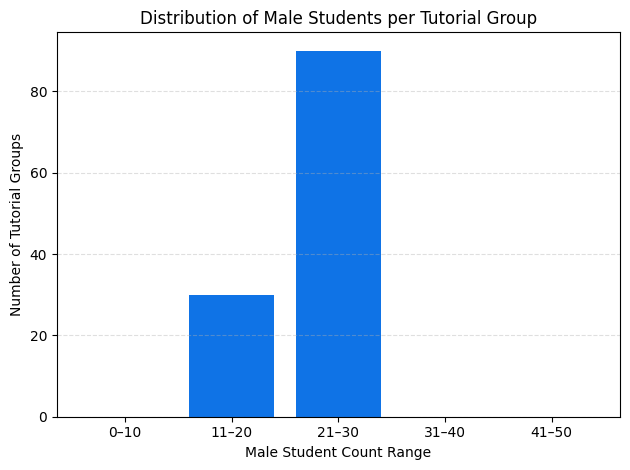

In [197]:
#Executable code:
PlotMaleRange(analysis)

##### **2.3.2. CGPA**
We plot the distribution of the mean CGPA of a tutorial group against the number of tutorial groups. Here are our takeaways from the graph:
- The mean CGPA distribution has a median around $4.09$.
- No data value is larger than $4.14$ or smaller than $4.05$, which shows that the tutorial groups are very similar in terms of average CGPA.

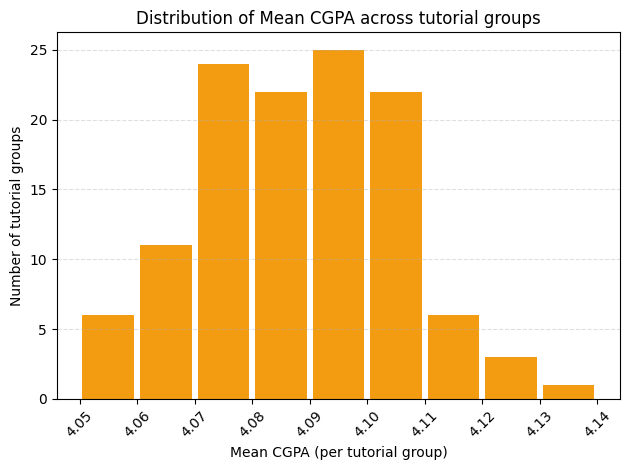

In [198]:
#Executable code:
PlotCGPA(analysis)

##### **2.3.3. Dominant school in tutorial groups**
We plot the distribution of the number of the largest group of students coming from the same school in a tutorial group against the number of tutorial groups. Here is our takeaway from the graph:
- It is *impossible* to make every single subgroup to comprise of 5 students from 5 different schools. This happens because there are more than 15 tutorial groups have more than 10 students from the same school, while we can only make 10 groups of 5 students from a tutorial group. By the Pigeonhole principle, there must exist some groups with at least 2 students coming from the same school. 


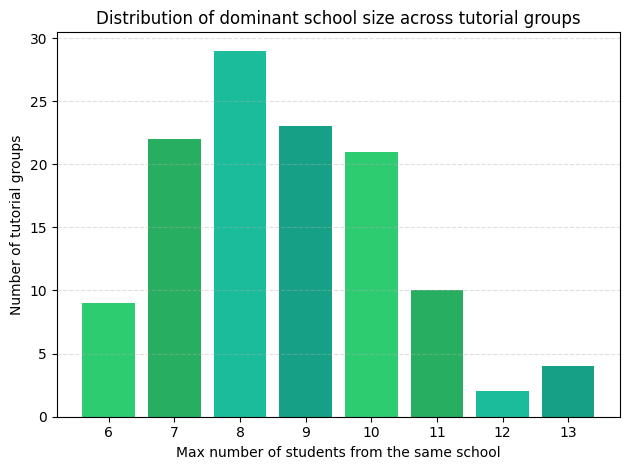

In [199]:
#Executable code:
PlotSchoolMax(analysis)

### **3. Allocate the students within a tutorial group into subgroups based on gender and CGPA diversity:**

In this step we only allocate students into subgroups of 5 students to ensure **gender** and **CGPA** diversity.

We do this in **9** steps:

**Step 1:** Split the list of students in a tutorial group into 2 groups containing only Male and Female students, then create 2 new male and female lists with their **CGPA** in descending order.

**Step 2:** Calculate the ratio of male:female students in a tutorial group. We calculate this ratio to find out about any tutorial group that is too skewered towards one gender. For groups of 5 students, the most gender-diverse type of group is 2 male - 3 female or 3 male - 2 female. So in case one gender in the tutorial group does not have at least **20** people, we must accept some groups with 1 male - 4 female or 4 male - 1 female. This corresponds to the ratio of male:female students to be less than **2/3** or larger than **3/2**.

**Step 3:** After finding the ratio of male:female students in a tutorial group, if the ratio is less than **2/3** or larger than **3/2**, we find the amount of groups that are 1 male - 4 female if the male:female ratio is less than **2/3** or the number of groups that are 4 male - 1 female if the male:female ratio is more than **3/2**. We do this by solving the matrix equation* below:
$$
    \begin{bmatrix}
    2 & 1 \\
    3 & 4
    \end{bmatrix}
    \times
    \begin{bmatrix}
    m \\
    n
    \end{bmatrix}
    =
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the equation above:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $m$ is the number of groups with a 3-2 member composition. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $n$ is the number of groups with a 4-1 member composition. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $x$ is the number of members having the minority gender. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $y$ is the number of members having the majority gender.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Solving the matrix equation gives us $m = \frac{4x - y}{5}$, $n = \frac{-3x + 2y}{5}$. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Combining with $m + n = 10$ and $x + y = 50$ gives us:
$$
    m = x - 10 \\
    n = 20 - x
$$

###### *The reason why we can confidently make a $2 \times 2$ matrix instead of a $3 \times 3$ matrix (adding in the choice of single-gendered groups) to calculate the number of groups is because we have determined at first that the number of males/females will not drop lower than 10. In other words, we can always make groups with only a 3-2 and 4-1 member composition.

**Step 4:** Create 10 groups of 4.

&nbsp;&nbsp;&nbsp;&nbsp;We pick four students first. There are **3** types of 4-people groups in our sorting:

&nbsp;&nbsp;&nbsp;&nbsp;- 2 male - 2 female (for any type of group) \
&nbsp;&nbsp;&nbsp;&nbsp;- 1 male - 3 female (for female-majority tutorial groups) \
&nbsp;&nbsp;&nbsp;&nbsp;- 3 male - 1 female (for male-majority tutorial groups) 

We can ensure that these groups of 4 have a mix of high cgpa and low cgpa by popping from the beginning and the end of the sorted male and female lists. 

The reason why we do this is by the time we have made 10 groups, we can allocate the remaining students into groups so that the gender diversity is most optimised (i.e. the last students will make the group gender dynamics 2-3 or 1-4)

**Step 5:** Create an unassigned students list of the unassigned male and female students by merging the sorted male and female list together. Then we create a new list that sorts the students by descending CGPA.

**Step 6:** Sort the allocated 4 people groups in ascending order by the group's average CGPA.

**Step 7:** Allocate the final members of the group into the groups of 4 by rainbow-matching the 4 people group with the highest average CGPA and the student with lowest CGPA in the unassigned student list.

**Step 8:** In case of any student is still unassigned and still remains in the unassigned list (although it should not happen), we make them into one final group and append it into our list of subgroups. 

**Step 9:** Return the allocated groups. \
The allocated groups should now have a 3-2 or 4-1 gender configuration, and the CGPA ranges of the group comes from the best and worst performers in the tutorial group, combined with the average fifth member we added in Step 7.  

The code below is the **Python code** for part **3.**:

In [200]:
# Function to allocate students in a tutorial group into groups of 5 students, based on gender and CGPA.
def Groups_of_5(student_list):

    #Helper functions to help sort students by and the 4 people groups in Step 1 and Step 6.
    #Code to sort by CGPA of a group (Used in Step 1):
    def criteria_cgpa(student):
        return student["cgpa"]

    def SortbyCGPA(student_list, reverse_or_not):
        return sorted(student_list, reverse=reverse_or_not, key=criteria_cgpa)

    #Code to sort the 4 people groups by ascending CGPA (Used in Step 6):
    def mean_cgpa(team):
        total = 0
        for s in team:
            total += s["cgpa"]
        return total / len(team)

    def SortSubgroupsByMeanCGPA(all_subgroups):
        return sorted(all_subgroups, key=mean_cgpa)
    #_____________________________________________________________________#

    #Code to classify Male and Female students and sort them by ascending/descending GPA (Step 1):
    Male_Students = [students for students in student_list if students["gender"] == "Male"]
    Female_Students = [students for students in student_list if students["gender"] == "Female"]

    number_of_male = len(Male_Students) # Number of boys in the tutorial group
    number_of_female = len(Female_Students) # Number of girls in the tutorial group

    Male_Students_sorted = SortbyCGPA(Male_Students, True) # Sort by CGPA from high -> low
    Female_Students_sorted = SortbyCGPA(Female_Students,True) # Sort by CGPA from high -> low

    # Calculate the male:female ratio as a variable: ratio_boy_girl in Step 2:
    # The variable ratio_boy_girl is used to handle skewed-gendered groups, as specified in Step 2 and Step 3.
    ratio_boy_girl = number_of_male/number_of_female
    #_____________________________________________________________________#

    #Code to allocate students into groups of 5 as specified from Step 4-8.
    all_subgroups = [] # Initialise a list to contain the allocated groups
    group_counter = 0 # Count the number of groups we have already made
    max_groups = 10 # The maximum amount of 5 people groups

    if 2/3 <= ratio_boy_girl <= 3/2: #Happens when the gender dynamics in the tutorial groups is not skewed.
        while len(Male_Students_sorted) >= 2 and len(Female_Students_sorted) >= 2 and group_counter < max_groups:
            # Make groups of 4 students as specified in Step 4.
            team = [
                    Male_Students_sorted.pop(0), #Male/High CGPA
                    Male_Students_sorted.pop(), #Male/Low CGPA
                    Female_Students_sorted.pop(0), #Female/High CGPA
                    Female_Students_sorted.pop() #Female/Low CGPA
                    ]

            all_subgroups.append(team)
            group_counter += 1


    elif ratio_boy_girl < 2/3: #Happens when the gender dynamics in the tutorial groups is female-skewed.
        while len(Male_Students_sorted) >= 1 and len(Female_Students_sorted) >= 3 and group_counter < max_groups:
            if group_counter < number_of_male - 10: # As calculated in Step 3.
                # Make groups of 4 students as specified in Step 4.
                team = [
                        Male_Students_sorted.pop(0), #Male/High CGPA
                        Male_Students_sorted.pop(), #Male/Low CGPA
                        Female_Students_sorted.pop(0), #Female/High CGPA
                        Female_Students_sorted.pop(), #Female/Low CGPA
                        ]

            elif group_counter >= number_of_male - 10:
                # Make groups of 4 students as specified in Step 4.
                team = [
                        Male_Students_sorted.pop(0), #Male/High CGPA
                        Female_Students_sorted.pop(), #Female/Low CGPA
                        Female_Students_sorted.pop(0), #Female/High CGPA
                        Female_Students_sorted.pop(), #Female/Low CGPA
                        ]

            all_subgroups.append(team)
            group_counter += 1
    
    elif ratio_boy_girl > 3/2: #Happens when the gender dynamics in the tutorial groups is male-skewed.
        while len(Male_Students_sorted) >= 3 and len(Female_Students_sorted) >= 1 and group_counter < max_groups:
            if group_counter < number_of_female - 10: # As calculated in Step 3.
                # Make groups of 4 students as specified in Step 4.
                team = [
                        Female_Students_sorted.pop(0), #Female/High CGPA
                        Female_Students_sorted.pop(), #Female/Low CGPA
                        Male_Students_sorted.pop(0), #Male/High CGPA
                        Male_Students_sorted.pop(), #Male/Low CGPA
                        ]

            elif group_counter >= number_of_female - 10:
                # Make groups of 4 students as specified in Step 4.
                team = [
                        Female_Students_sorted.pop(0), #Female/High CGPA
                        Male_Students_sorted.pop(), #Male/Low CGPA
                        Male_Students_sorted.pop(0), #Male/High CGPA
                        Male_Students_sorted.pop(), #Male/Low CGPA
                        ]

            all_subgroups.append(team)
            group_counter += 1

    #Group all remaining students into a list, then sort them with descending CGPA. (Step 5)
    Unsorted_Students = Male_Students_sorted + Female_Students_sorted
    Unsorted_Students_sorted = SortbyCGPA(Unsorted_Students, True) #Sort the remaining student's CGPA from high to low

    all_subgroups_sorted = SortSubgroupsByMeanCGPA(all_subgroups) #Sort teams' CGPA from low to high (Step 6)
    
    num_of_4_people_groups = len(all_subgroups_sorted)
    num_of_remaining_students = len(Unsorted_Students)

    for i in range(min(num_of_4_people_groups, num_of_remaining_students)): 
        if len(all_subgroups_sorted[i]) == 4: #To ensure that subgroups only have 4 students.
            all_subgroups_sorted[i].append(Unsorted_Students_sorted.pop(0)) #Rainbow-matching the students (Step 7)

    #To handle anyone remaining in the unsorted students by putting them into a group. This list should now be empty (Step 8)
    if Unsorted_Students_sorted:
        remaining_groups = [remaining_students for remaining_students in Unsorted_Students_sorted]
        all_subgroups.append(remaining_groups)

    return all_subgroups #Step 9

### **4. Re-allocating the groups to enhance school diversity:**

Since in the previous part we have not considered school as an allocating criteria, there might be some groups that has a school majority (i.e 3+ students in the same school in their allocated group). Thus, we have to swap students in different allocated groups (within the same tutorial group) together so that the allocated groups are more school-diversified. As we have successfully allocated students based on gender and CGPA in the previous part, we must swap students carefully to not disturb our gender and CGPA diversity. So, our logic to facilite a swap between 2 students is as follows:

Let us have two groups that we wish to swap students together called group A and group B, and the students that are swapped in their respective groups called student A and student B. The criteria to swap students is as follow:
1. Student A must not come from the same school as the students in group B.
2. Student B must not come from the same school as the students in group A.
3. Student A and B must have the same gender.
4. Student A and B must only have a CGPA difference of less than 7.5%.

This part has **2** main parts: 
+ Part 4.1: The helper functions to assist with the swapping 
+ Part 4.2: The main function to swap the students within a group

#### **4.1. Helper functions:**

To assist in allocating the students, we have to create a few helper functions to: 
- Find the type of schools in a group.
- Check if the group is not school-diverse enough (more than `n // 3` students from same school in a group of `n` students).
- Find the first school that has more students than our school-diverse criteria in our non-school-diverse group.
- Pick the student that needs to be swapped in the non-school-diverse group.
- Check for CGPA difference between the student that needs to be swapped and potential students being picked for swapping.
- Swapping function to swap the 2 students from different allocated groups together.

We will go deeper into the details of the helper functions below.

##### **4.1.1. Find the type of schools in a group.**

We use a dictionary to count the number of school types in a group. The first loop goes through every single school and initialise the `key:value` pairs to be `<School type>:0` (E.g: `CCDS:0`). The second loop counts the number of students in that particular school.

In [201]:
def Check_School_types_in_subgroup(a_list):
    #Function to count number of school types + number of students at what school.
    Reps = {}
    for students in a_list:
        Reps[students["school"]] = 0
    for students in a_list:
        Reps[students["school"]] += 1
    return Reps

Example: A group of students have these types of schools: 

    `[{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]`

Then what the above function will return is:

    `{'CCDS': 2, 'EEE': 2, 'ASE': 1}`

In [202]:
print(Check_School_types_in_subgroup([{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]))

{'CCDS': 2, 'EEE': 2, 'ASE': 1}


##### **4.1.2. Check if the group is school-diverse enough or not.**

We called the dictionary we made in the last function and go through every single key of the dictionary. If the value associated with that key is more than the number of students in the group floor divided by 3, than that group is not school-diverse enough and we return `False`. If all values are smaller than the number of students in the group floor divided by 3, we return `True`.

In [203]:
def Check_School_Diversity(a_list):
    #Function to ensure the group has school diversity.
    School_type = Check_School_types_in_subgroup(a_list)
    number_of_students = len(a_list)
    for schools in School_type.keys():
        if School_type[schools] > number_of_students // 3:
            return False
    else:
        return True

Example: A group of students have these types of schools: 

    `[{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]`

Then what the above function will return is:

    `False`

In [204]:
print(Check_School_Diversity([{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]))

False


##### **4.1.3. Find the first school that has more students than our school-diverse criteria in our non-school-diverse group.**

We want this function to find the first type of school that is causing the group to be not diverse enough. We run through the dictionary we created with the `Check_School_types_in_subgroup` function again after finding our undesired group to find out and return the first type of school that exceeds our school diversity criteria.

In [205]:
def Check_Repeating_School(a_list):
    #Function to return the first type of school that repeats itself
    School_type = Check_School_types_in_subgroup(a_list)
    number_of_students = len(a_list)
    for schools in School_type.keys():
        if School_type[schools] > number_of_students // 3:
            return schools

Example: A group of students have these types of schools: 

    `[{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]`

Then what the above function will return is:

    `CCDS`

In [206]:
print(Check_Repeating_School([{"school":"CCDS"},{"school":"CCDS"},{"school":"EEE"},{"school":"EEE"},{"school":"ASE"}]))

CCDS


##### **4.1.4. Pick the student that needs to be swapped in the non-school-diverse group.**

We now pick the first student to swap. That student must come from the allocated group that is not school-diverse enough, and that student must also have the same school as the school that is causing the allocated group to be non-diverse. We run through the group and pick the first student that satifies the above criteria, and return his/her index in the group and his/her information.

In case if there are actually no groups that is not school diverse, then the `repeated_school` variable in the function below will be `None`, and no student comes from `None`, so we return `None` at the end of the loop.

In [207]:
def Pick_out_the_student(a_list):
    #Function to pick one student that is from a repeated school by their index in the list and themself.
    repeated_school = Check_Repeating_School(a_list)
    for student_index, student in enumerate(a_list):
        if student["school"] == repeated_school:
            return (student_index, student)
    else:
        return None

##### **4.1.5. Check for CGPA difference between the student that needs to be swapped and potential students being picked for swapping.**

After picking our first student to swap, we now pick the second student. Other than coming from a different school than the schools in the swapping group and having the same gender as the first student, we must ensure that his/her grade is within an acceptable range compared to the first student (7.5%*). If the second student's CGPA lies within 7.5% of the first student's CGPA, we return `True`, otherwise we return `False`.

In [208]:
def CGPA_variance_check(student_a, student_b):
    #Function to check for grade variance between the students
    if abs(student_a["cgpa"] - student_b["cgpa"]) <= student_a["cgpa"] * 0.075:
        return True
    else:
        return False

###### *7.5% is 0.3/4, so even the highest CGPA students (4.5+) can swap with students that are 0.34 CGPA points lower (4.2 CGPA, around median). Doing this would not affect the CGPA balance very much, since if we swap a 4.5 CGPA student and a 4.2 CGPA student, the 2 group's average CGPA would only shift by 0.06 CGPA points

##### **4.1.6. Swapping function to swap the 2 students from different allocated groups together.**

We call the tutorial group that has its members allocated into subgroups in part `2`, the indices of the 2 subgroups that has students that can be swapped in the two groups, as well as the indices of the 2 students those 2 subgroups. After swapping, we return the tutorial group with the two students being swapped put into new subgroups.

In [209]:
def Group_swapper(list_of_lists, group_a, student_a, group_b, student_b):
    #Function to swap students using their indices in the big list
    list_of_lists[group_b][student_b], list_of_lists[group_a][student_a] = list_of_lists[group_a][student_a], list_of_lists[group_b][student_b]
    return list_of_lists

#### **4.2. Main function:**

The main function that facilitates swapping the students. It will keep swapping the students until either one of these two conditions happen (`break` conditions):
1. Every group after swapping is school diverse.
2. We cannot swap anymore. This happens in cases when the number of students coming from the same school in a tutorial group is larger than (the number of subgroups) * (the number of students in a subgroup // 3), or we cannot find a suitable candidate to swap.

In one iteration of the main `while` loop, there are **4** main steps:

**Step 1:** We set the index and value of the non-school diverse groups as sentinel values (-1 and [ ] respectively).

**Step 2:** We go through every subgroup and every student to find the first non-school-diverse group, as well as the student we wish to swap by using the `Check_School_Diversity` function (Function **4.1.2**). When we found the first non-school-diverse group, we save its index and the group itself. We also call the `Check_School_types_in_subgroup` function (Function **4.1.1**) on our newly saved group to find out about the schools types in the group. This is to check conditions 1 and 2 in the swapping condition in the next steps. 

**Step 3:** We choose the student that we need to swap in the non-school-diverse group using the `Pick_out_the_student` function (Function **4.1.4**). We save the student's information and his/her index in the non-school-diverse group. If all groups in the list are diverse, the `Pick_out_the_student` function will be working with an empty list, and it will return `None`. 

We can break out of the `while` loop in step 3 if all groups are school-diverse (`break` condition 1).

**Step 4:** We run through the list of allocated groups again to find our swapping student. There are **3** smaller steps in this step.

- First, we set up a boolean value to mark whether if we can swap the students or not (`swapped_yet_or_not`) and assign it as `False`. 
- Second, we go through all the other groups (except the non-school-diverse group we pick before) using a `for` loop. For every group we go through we take its index and save the group's information to call the `Check_School_types_in_subgroup` function. This is also to check conditions 1 and 2 in the swapping condition in the next steps. 
- Third, we go through every student in every group by using a second `for` loop and take the student's index in his/her group. Here, we will check the student using the conditions we stated at the beginning of this part. If we find the student that satisfies all of our conditions, we swap them using the `Group_swapper` function (Function **4.1.6**). After swapping, we switch `swapped_yet_or_not` into `True` and break of of the two `for` loops.

&nbsp;&nbsp;&nbsp;&nbsp;In case we cannot sort anymore since we cannot find a student that can be swapped, this can happen if the tutorial groups have more students coming &nbsp;&nbsp;&nbsp;&nbsp;from the same school than the number of groups, then we break out of the `while` loop (`break` condition 2).


This is the **pseudocode** and **flowchart** of this part:

**Pseudocode:**

`FUNCTION FixSchoolDiversity(groups):` \
    `LOOP FOREVER:`

        undesired_index = -1
        undesired_group = None

        # 1. Find first group that fails school diversity
        For each group index:
            If IsSchoolDiverse(groups[index]) == False:
                undesired_index = index
                undesired_group = groups[index]
                BREAK

        # No undesired groups left → done
        If undesired_group is None:
            BREAK

        # 2. Pick a student from a repeated school
        pick = PickStudentFromRepeatedSchool(undesired_group)
        If pick is False:
            BREAK
        undesired_student_index, undesired_student = pick

        undesired_school_counts = CountSchoolTypes(undesired_group)

        swapped = False

        # 3. Try to find a valid swap partner
        For each group B index ≠ undesired_index:
            swap_group = groups[B]
            swap_school_counts = CountSchoolTypes(swap_group)

            For each student in swap_group:
                If undesired_student.school not in swap_school_counts:
                    If student.school not in undesired_school_counts:
                        If student.gender == undesired_student.gender AND
                           CGPAWithinLimit(undesired_student, student):
                                SwapStudents(groups, undesired_index, undesired_student_index, swap_index, swap_student_index)
                                swapped = True
                                BREAK inner loop

            If swapped:
                BREAK outer loop

        # 4. If no swap is possible → stop
        If swapped == False:
            BREAK

    RETURN groups

**Flowchart**

<img src="assets/Flowchart of Part 4.jpg" width="500" height="1000">

The code below is the **Python code** for part **4.2.**:

In [210]:
#Function to keep swapping students to enhance school diversity.
def Swapping_students(list_of_lists):
    while True:

        undesired_group_index = -1 #Step 1
        undesired_group = []

        #Code to find the first non-school-diverse group (Step 2)
        for group_index in range(len(list_of_lists)):
            if not Check_School_Diversity(list_of_lists[group_index]):
                undesired_group_index = group_index
                undesired_group = list_of_lists[group_index]
                break
        #Code to get the school types in that undesired group
        School_types_in_undesired_group = Check_School_types_in_subgroup(undesired_group)
        
        #Code to get our student in the undesired group. 
        if Pick_out_the_student(undesired_group) != None:
            undesired_student_index, undesired_student = Pick_out_the_student(undesired_group) #(Step 3)
        else: # If there is no more undesired_groups, we break out of the while loop (break condition 1)
            break 
        #_____________________________________________________________________#

        #Code to rearrange students as specified in Step 4.

        swapped_yet_or_not = False #Marker to check if we have made a swapping move or not (First step in Step 4)
        
        for swapper_group_index in range(len(list_of_lists)):
            if swapper_group_index == undesired_group_index:
                continue

            #Get the index and school types for the swapper_group (Second step in Step 4)
            swapper_group = list_of_lists[swapper_group_index]
            School_types_in_swapper_group = Check_School_types_in_subgroup(swapper_group)

            for swapper_student_index in range(len(swapper_group)): #(Third step in Step 4)
                swapper_student = swapper_group[swapper_student_index]
                
                if undesired_student["school"] not in School_types_in_swapper_group.keys():
                    #If the undesired student has different school to the swapper group.
                    
                    if swapper_student["school"] not in School_types_in_undesired_group.keys(): 
                        #If the swapper student has different school to the undesired group.
                        
                        if swapper_student["gender"] == undesired_student["gender"] and CGPA_variance_check(undesired_student, swapper_student) == True:
                            #If the swapper student has the same gender and CGPA around as the undesired student(5%).
                                
                            list_of_lists = Group_swapper(list_of_lists, undesired_group_index, undesired_student_index, swapper_group_index, swapper_student_index)
                            #After satisfying all the conditions above, we swap students.
                            
                            swapped_yet_or_not = True #Mark as having swapped the 2 students.
                            break #Get out of the small loop.

            if swapped_yet_or_not == True: #After swapping, get out of the big loop.
                break
        
        if swapped_yet_or_not == False: 
            #In case when the number of students with the same school is larger than the number of groups (break condition 2)
            break
    
    return list_of_lists

### **5. Write the output as a `.csv` file**
After creating functions to allocate and redistribute students within a tutorial group, we now apply the functions we created in the previous 2 parts for every single tutorial group to return the students - assigned and marked with their group - and write our output file.

This part has **2** main parts: 
+ Part 5.1: Generate our allocated groups within the tutorial group.
+ Part 5.2: Write the output data down.

#### **5.1. Generate the students allocated files:**
We made a function with the single parameter being the data we extracted in Part 1. The function consists of **5** steps:

**Step 1:** We created an empty dictionary to add `key:value` pairs, with keys as the tutorial group name and values as a dictionary containing all information of the subgroups created from the tutorial group.

**Step 2:** We run a `for` loop through all the `key:value` pairs of the input data, and allocate the students in the tutorial group student list associated with the `key` (Tutorial group name) by calling `Groups_of_5` (Function in part `3`) and `Swapping_students` (Function in part `4.2`) to allocate students into their mini groups.

**Step 3:** We mark and save the groups into a dictionary. This step consists of **3** smaller steps.

- First, after assigning students into their subgroups, we create a dictionary with the keys are the name of the assigned group and values are a list of students in that assigned group. 
- Second, we run a `for` loop through all the allocated groups in the tutorial group. \
In every iteration of the loop, we run a `for` loop through the students in their allocated groups to mark them. We mark them by adding a `key:value` pair into the student's dictionary with the key is `"team_assigned"` and values is n the format: `f"{students["tutorial_group"]}-T{i + 1}"`, with `students["tutorial_group"]` being the tutorial group's name and `i` being the index of the subgroup in the tutorial group. \ 
- Third, we add the student group into the dictionary we made at the beginning of step 3.

**Step 4:** After adding every student in the tutorial group with their subgroup's information and put all the allocated groups from the original tutorial group into the dictionary we made in Step 3, we add the dictionary we made in Step 3 into the dictionary we made in Step 1.

**Step 5:** Return the final dictionary. The student and their groups' information is save in this format: \
        `{'G-1': {'G-1-T1': [{student data}, ...], ... }, ... }`


The code below is the **Python code** for part **5.1**:

In [211]:
def Group_Sorting(groups):

    Output_groups = {} #Step 1

    for tut_group_name, student_list in groups.items():
        #Use the Groups_of_5 and Swapping_students functions (Step 2)
        subgroups = Groups_of_5(student_list)
        subgroups = Swapping_students(subgroups)
        
        #Mark and allocate the subgroups (Step 3)
        subgroups_rehashed = {}
        for i, subgroup in enumerate(subgroups):
            for students in subgroup:
                students["team_assigned"] = f"{students["tutorial_group"]}-T{i + 1}"
            subgroups_rehashed[f"{tut_group_name}-T{i + 1}"] = subgroup
 
        Output_groups[tut_group_name] = subgroups_rehashed #Step 4
    
    return Output_groups

In [212]:
#Executable code:
Output_groups = Group_Sorting(groups)

#### **Part 5.2: Write the data out as a `.csv` file:**

We created a function to return our group allocations in a `.csv` file based on the output dictionary after allocating the students in their respective groups. The function consists of **3** steps:

**Step 1:** Write the first line of the file, which is: "Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Assigned"

**Step 2:** We pick each assigned-group by ascending order from `"G-1-T1"` to the final group by using a `for` loop running from 0 to 119 to call each `key:value` pairs, then use the method `.values()`.

**Step 3:** In each iteration of the 2 outer `for` loops, we write down in each line the information of every single student and their assigned groups.

The code below is the **Python code** for part **5.2**:

In [213]:
#Function to write our output .csv file.
#The data structure of Output_groups is:{ 'G-1': { 'G-1-T1': [{student data}, ...], ... }, ... }

def WriteOutput(Output_groups):
    with open("FDAE_Team4_NguyenXuanHoang.csv", mode='w') as file:
        file.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Assigned" + "\n") #Step 1
        for i in range(120): 
            for allocated_groups in Output_groups[f"G-{i + 1}"].values(): 
                for students in allocated_groups: 
                    row_values =[
                                students["tutorial_group"],
                                students["student_id"],
                                students["school"],
                                students["name"],
                                students["gender"],
                                str(students["cgpa"]),
                                students["team_assigned"]
                                ]
                    data_row = ",".join(row_values) + "\n"
                    file.write(data_row)

In [214]:
#Executable code:
WriteOutput(Output_groups)

### **6. Analyse the output `.csv` file:**

We will now analyse the effectiveness of our algorithm by graphing out the gender parity in a group, the number of diverse schools in a group against the number of allocated teams, and the standard deviation of the subgroups created from the tutorial group group against the number of tutorial groups. In this part we also use the matplotlib library to analyse our function. This part has **4** main parts:

+ Part 6.1: Helper functions to help with collecting the data.
+ Part 6.2: Collect the data.
+ Part 6.3: Plot the graphs.
+ Part 6.4: Analysis of the graphs.

#### **6.1. Helper functions to help with collecting the data:**

To assist in collecting our data, we have to create a few helper functions to: 
- Calculate the mean CGPA of students in a group.
- Calculate the standard deviation of the allocated groups' CGPA in their original tutorial group.
- Generate the values under the x-axis of the CGPA graph.
- Save the values under the x-axis of the CGPA graph into a dictionary.

We will go deeper into the details of the helper functions below.

##### **6.1.1. Calculate the mean CGPA of students in a group.**
This function goes through all the CGPA data of students in a group, and return its average. We also put in a safeguard in case when the input list is an empty list.


In [215]:
def calculate_mean(data):
    """Calculates the mean (average) of a list of numbers."""
    if not data:
        return 0.0
    return sum(data) / len(data)

##### **6.1.2. Calculate the standard deviation of the allocated groups' CGPA in their original tutorial group.**

This function returns the standard deviation of a list of numbers. We cannot calculate the standard deviation if the list has less than 2 numbers, so we return 0 in that case.

In [216]:
import math
def calculate_std_dev(data, mean_value):
    """Calculates the population standard deviation of a list of numbers."""
    N = len(data)
    if N < 2:
        return 0.0
    
    # Calculate sum of squared differences from the mean
    sum_sq_diff = sum([(x - mean_value) ** 2 for x in data])
    
    # Population standard deviation formula: sqrt(sum_sq_diff / N)
    variance = sum_sq_diff / N
    
    return math.sqrt(variance)

##### **6.1.3. Generate the values under the x-axis of the CGPA graph.**

First, we initialise the potential standard deviation values from 0.00 to 0.16 and save it into a list called `SD_BINS`. \
Then, we run through all the types of standard deviation of the tutorial groups, and classify it between its rounded up and rounded down values.

In [217]:
# Define the boundaries for the 0.01 interval bins (up to 0.15)
SD_BINS = [round(i * 0.01, 2) for i in range(17)] # 0.00, 0.01, ..., 0.16

def get_sd_bin(sd_value):
    if sd_value > 0.15:
        return '>0.15'
    for i in range(len(SD_BINS) - 1):
        lower_bound = SD_BINS[i]
        upper_bound = SD_BINS[i+1]
        if i == 0 and 0.0 <= sd_value <= 0.01:
            return '0.00-0.01'
        if lower_bound < sd_value <= upper_bound:
            return f'{lower_bound:.2f}-{upper_bound:.2f}'
    return 'Other'

Example: A tutorial group has `sd_value` to be `0.034`

Then the function above will return `0.03-0.04`

In [218]:
print(get_sd_bin(0.034))

0.03-0.04


##### **6.1.4. Sort the standard deviation values of the tutorial group.**

We initialise a dictionary to store the number of standard deviation values that corresponds with the values generated from the last function.  

In [219]:
# Stores the standard deviation distribution
sd_distribution_counts = {}

def initialize_sd_bins():
    global sd_distribution_counts
    sd_distribution_counts = {} 
    for i in range(len(SD_BINS) - 1):
        lower_bound = SD_BINS[i]
        upper_bound = SD_BINS[i+1]
        sd_distribution_counts[f'{lower_bound:.2f}-{upper_bound:.2f}'] = 0
    sd_distribution_counts['>0.15'] = 0

#### **6.2. Collect the data:**
After using the helper functions to initialise a dictionary to collect the values for CGPA standard deviation (`sd_distribution_counts`), we created 2 new dictionaries to collect school and gender related data (`gender_ratio_counts` and `school_diversity_counts`), and a new dictionary to contain all the relavent CGPA data of each tutorial group and the allocated groups inside it (`group_stats`) to calculate data for `sd_distribution_counts`.


In [220]:
# Stores results for plotting and summarizing CGPA 
group_stats = {}

# Stores the final counts for the gender and school bar charts
gender_ratio_counts = {'5:0': 0, '4:1': 0, '3:2': 0, '2:3': 0, '1:4': 0, '0:5': 0, 'Other': 0}
school_diversity_counts = {5: 0, 4: 0, 3: 0, 2: 0, 1: 0} # Key is number of unique schools


After creating the dictionaries, we created a function with the input parameter as the student data with their groups in generated in Part 5.1 to collect data for the dictionaries above. We do this in **10** steps:

**Step 1:** We initialise a list to collect all tutorial group's standard deviation values (`all_group_sd_values`).

**Step 2:** We run a `for` loop through all the tutorial groups, and make a list to obtain every tutorial group's CGPA.

**Step 3:** In the first `for` loop, we initialise the data we collect for the `group_stats`: all the CGPA means of the allocated groups, the tutorial group's mean CGPA, and the standard deviation of the allocated groups in the tutorial group.

**Step 4:** After that, we initialise the lists to collect the mean CGPA of the allocated groups.

**Step 5:** We open a new `for` loop go into each allocated group. In this `for` loop we calculate the mean CGPA of the allocated group by using the `calculate_mean` function (Function 6.1.1).

**Step 6:** We calculate the number of males and females in each group, classify the group type by gender proportion and add them to `gender_ratio_counts`.

**Step 7:** We calculate the number of distinct schools in group by using the `set` function and add them to `school_diversity_counts` before ending the inner `for` loop.

**Step 8:** After exiting the inner `for` loop, we calculate the mean CGPA of the tutorial group by using the `calculate_mean` function (Function 6.1.1), and add this value into `group_stats`.

**Step 9:** Afterwards, we calculate the standard deviation for each tutorial group, and add this value into `group_stats` before ending the outer `for` loop.

**Step 10:** We initialise the dictionary to store CGPA standard deviation values (`sd_distribution_counts`) by calling the `initialize_sd_bins` function (Function 6.1.4) and run all the standard deviation values we have in the `all_group_sd_values` and sort accordingly into `sd_distribution_counts`.




In [221]:
def analyze_diversity_and_stats(tut_groups_map):
    """Performs all team-level and group-level statistical analysis."""

    all_group_sd_values = [] #Step 1

    for tut_grp_name, teams_in_group in tut_groups_map.items(): #First for loop (Step 2)
        
        team_cgpa_means = []
        
        if tut_grp_name not in group_stats: #Initialising data collected for the group_stats dictionary (Step 3)
             group_stats[tut_grp_name] = {
                'team_cgpa_means': [],
                'group_mean_cgpa': 0.0,
                'sd_of_team_means': 0.0
            }

        # List to collect all CGPAs in the group for overall mean calculation (Step 4)
        all_group_cgpas = []
        
        for students in teams_in_group.values():
            team_size = len(students)
            
            #Team CGPA Mean and Collection (Step 5)
            team_cgpas = [s['cgpa'] for s in students]
            team_mean_cgpa = calculate_mean(team_cgpas)
            team_cgpa_means.append(team_mean_cgpa)
            all_group_cgpas.extend(team_cgpas)

            #Gender Diversity Ratio Evaluation (Step 6)
            if team_size == 5:
                male_count = sum(1 for s in students if s['gender'] == 'Male')
                female_count = team_size - male_count
                ratio_key = f'{male_count}:{female_count}'
                
                if ratio_key in gender_ratio_counts:
                    gender_ratio_counts[ratio_key] += 1
                else:
                    gender_ratio_counts['Other'] += 1
            elif team_size != 0:
                 gender_ratio_counts['Other'] += 1

            #School Diversity Evaluation (Step 7)
            unique_schools = set(s['school'] for s in students)
            num_unique_schools = len(unique_schools)
            
            if num_unique_schools in school_diversity_counts:
                school_diversity_counts[num_unique_schools] += 1
        
        # Calculate Group Mean CGPA (Mean of all students in the tutorial group) (Step 8)
        group_mean_cgpa = calculate_mean(all_group_cgpas)
        group_stats[tut_grp_name]['group_mean_cgpa'] = group_mean_cgpa

        # Calculate Standard Deviation (SD) of Team Means within the group and add them into the group_stats dictionary (Step 9) 
        # This checks the consistency of team quality within the tutorial group.
        if len(team_cgpa_means) >= 2:
            mean_of_team_means = calculate_mean(team_cgpa_means)
            sd_of_means = calculate_std_dev(team_cgpa_means, mean_of_team_means)
            group_stats[tut_grp_name]['sd_of_team_means'] = sd_of_means
            all_group_sd_values.append(sd_of_means)
        else:
            group_stats[tut_grp_name]['sd_of_team_means'] = 0.0

    #Step 10: putting CGPA deviation data into the sd_distribution_counts dictionary.
    initialize_sd_bins() # Ensure bins are ready
    
    for sd_val in all_group_sd_values:
        bin_key = get_sd_bin(sd_val)
        if bin_key in sd_distribution_counts:
            sd_distribution_counts[bin_key] += 1

In [222]:
# Executable code:
analyze_diversity_and_stats(Output_groups)

#### **6.3. Plot the graphs:**
After obtaining the data, we created three functions to plot every group's gender, CGPA and school dynamics by the criterias using the `matplotlib` library. For every plotting function, we have **2** steps:

**Step 1:** Collect the relavent data of each tutorial group from the last part (e.g CGPA sd for CGPA-related plot)

**Step 2:** Plot the graphs.

The code below is the **Python code** for part **6.3**:

In [223]:
import matplotlib.pyplot as plt

def plot_gender_diversity(counts):
    """Generates a bar chart showing the distribution of gender ratios."""
    
    #Extract the gender data we collected (Step 1)
    #Filter out 'Other' for cleaner plotting if its count is 0
    labels = [k for k in counts.keys() if counts[k] > 0 or k != 'Other']
    data = [counts[k] for k in labels]
    
    #Handles cases when labels and data are empty lists.
    if not labels or sum(data) == 0:
        print("No gender ratio data to plot.")
        return
    
    #Plotting our gender dynamics part (Step 2)
    plt.figure(figsize=(10, 6)) #Create a new figure.
    plt.bar(labels, data, color=['#3498db', '#5dade2', '#85c1e9', '#e74c3c', '#ec7063', '#f1948a', '#95a5a6']) #Make the bars.
    
    plt.xlabel(f'Male:Female Ratio (Teams of {5})', fontsize=12) #Label for the x axis.
    plt.ylabel('Number of Teams', fontsize=12) #Label for the y axis.
    plt.title(f'1. Gender Diversity (Male:Female Ratio) Across All Teams', fontsize=14, fontweight='bold') #Title of the output graph.
    plt.grid(axis='y', linestyle='--', alpha=0.6) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.


def plot_school_diversity(counts):
    """Generates a bar chart showing the distribution of unique school counts."""
    
    #Extract the school data of each allocated group (Step 1)
    #Sort keys for consistent plotting order (5 down to 1)
    #Filter for keys that have data and map to string labels
    present_keys = sorted([k for k in counts.keys() if counts[k] > 0], reverse=True)
    labels_str = [str(k) for k in present_keys]
    data = [counts[k] for k in present_keys]

    #Handle cases when data is an empty list.
    if sum(data) == 0:
        print("No school diversity data to plot.")
        return

    #Plotting our school dynmaics part (Step 2)
    plt.figure(figsize=(10, 6)) #Create a new figure.
    plt.bar(labels_str, data, color=['#2ecc71', '#27ae60', '#1abc9c', '#16a085', '#34495e']) #Make the bars.
    
    plt.xlabel('Number of Unique Schools per Team', fontsize=12) #Label for the x axis.
    plt.ylabel('Number of Teams', fontsize=12) #Label for the y axis.
    plt.title('2. School Diversity Across All Teams', fontsize=14, fontweight='bold') #Title of the output graph.
    plt.grid(axis='y', linestyle='--', alpha=0.6) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.


def plot_sd_distribution(counts):
    """Generates a bar chart showing the frequency of Standard Deviation values in 0.01 bins."""
    
    #Extract the CGPA data of each tutorial group (Step 1)
    # Ensure all bins are included, in sorted order
    labels = sorted(counts.keys())
    # Move '>0.15' to the end for logical display
    if '>0.15' in labels:
        labels.remove('>0.15')
        labels.append('>0.15')
        
    data = [counts[k] for k in labels]

    #Handle cases when data is an empty list.
    if sum(data) == 0:
        print("No SD distribution data to plot (Need at least two teams per group).")
        return
    
    #Plotting our CGPA dynmaics part (Step 2)
    plt.figure(figsize=(12, 6)) #Create a new figure.
    plt.bar(labels, data, color='#f39c12') #Make the bars.
    
    plt.xlabel('Standard Deviation (SD) Range of Team Mean CGPAs (0.01 Intervals)', fontsize=12) #Label for the x axis.
    plt.ylabel('Number of Tutorial Groups', fontsize=12) #Label for the y axis.
    plt.title('3. Distribution of CGPA Consistency (SD of Team Means per Group)', fontsize=14, fontweight='bold') #Title of the output graph.
    plt.xticks(rotation=45, ha='right', fontsize=10) #Rotate the y axis titles by 45 degrees
    plt.grid(axis='y', linestyle='--', alpha=0.6) #Add in dashed lines for easier visualisation
    plt.tight_layout() #Re-adjust the graph to be neater.
    plt.show() #Show the graph.

#### **6.4. Analysis of the graphs:**

In this part we will go through the Gender, School and CGPA graphs and analyse them.

##### **6.4.1. Gender**

We plot the `male:female` ratio in the allocated groups against the number of tutorial groups. Our algorithm has assured that all groups are not one-gendered, and the number of groups with a 1-4 composition is most optimised. (Show with our collected data in Part 2 and our Math in Part 3). The number of teams with a gender composition of 1 Male and 4 Females is 26 out of 1200 groups, which corresponds to $2.17 \%$ of the total amount of groups, while there are no teams with 4 Males and 1 Female.

{'5:0': 0, '4:1': 0, '3:2': 385, '2:3': 789, '1:4': 26, '0:5': 0, 'Other': 0}


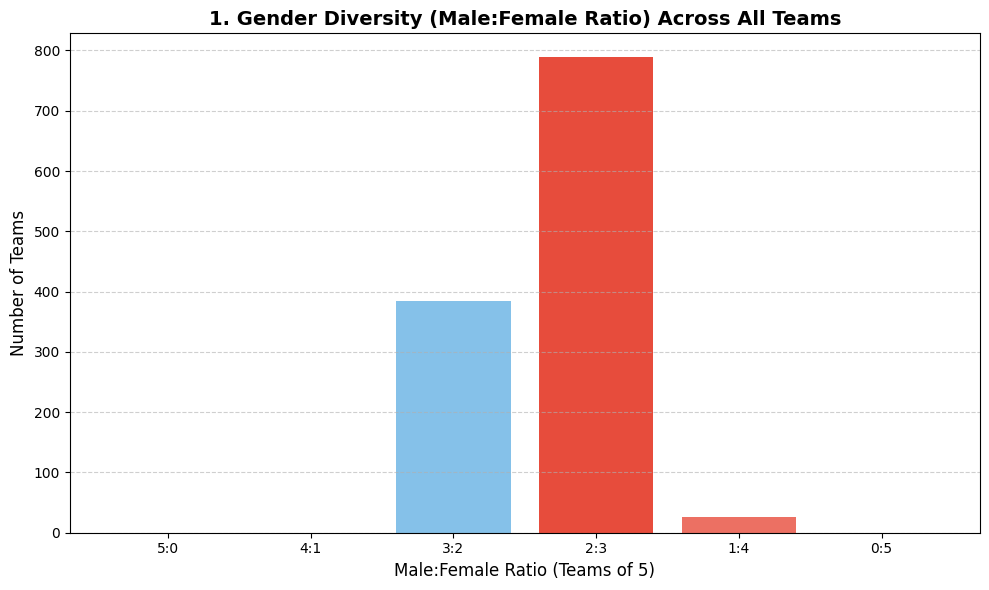

In [224]:
# Executable code:
print(gender_ratio_counts)
plot_gender_diversity(gender_ratio_counts)

##### **6.4.2. School**

We plot the number of different schools in our allocated teams against the number of allocated teams. Our algorithm had ensured that 1137 teams ($94.75 \% $) have 5 diverse schools and 43 ($3.58 \% $) teams have 4 diverse schools (i.e 2 students in the group come the same school). There are only 20 teams ($1.67 \% $) have only 3 different schools in their group.

The reason why there still exist teams with less than 5 diverse schools despite we have re-allocated the students in Part 4 is because the groups with less than 5 types of schools cannot find any more potential swaps that satisfies the CGPA criteria we outlined at the beginning of Part 4.

{5: 1138, 4: 42, 3: 20, 2: 0, 1: 0} (Keys are the number of schools in the allocated team.)


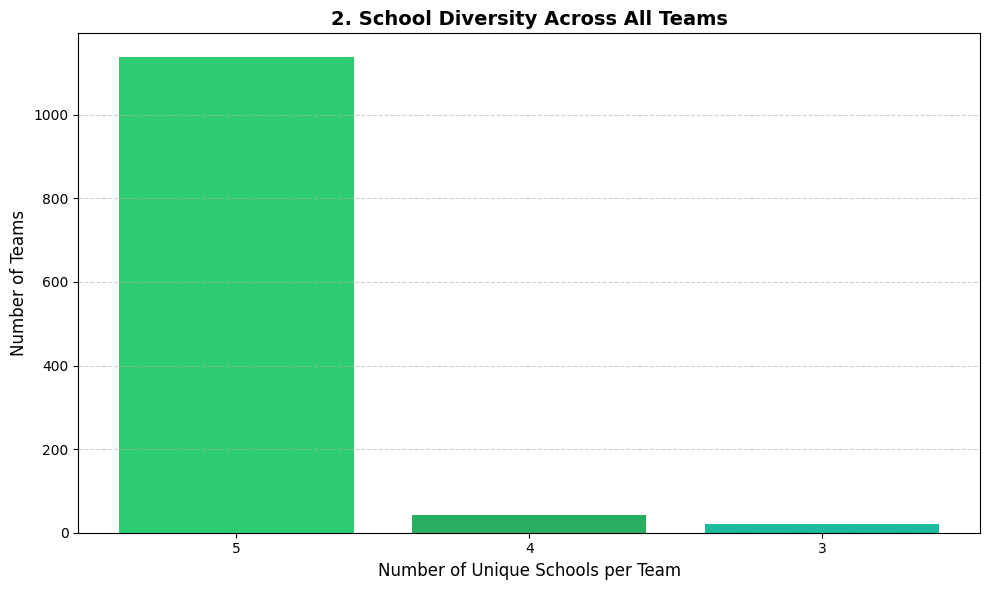

In [225]:
#Executable code:
print(school_diversity_counts, "(Keys are the number of schools in the allocated team.)")
plot_school_diversity(school_diversity_counts)

##### **6.4.3. CGPA**

We plot the standard deviation of allocated groups in their original tutorial group against the number of tutorial groups. The reason why we do this is because the mean CGPA of every tutorial group is not the same, so we have to calculate the standard deviation of all the new teams inside the original group. The lower the standard deviation, the better our algorithm is.

Overall, all tutorial groups have a median sd of $0.02-0.04$, which means that in most of the tutorial groups, all of our teams' average CGPA only deviates away from the average CGPA of the tutorial group by $0.05-0.08$ CGPA points. Moreover, all sds are less than $0.07$, which means that our worst allocated groups in terms of CGPA only has their mean CGPA deviating less than $0.14$ CGPA points from the tutorial group mean (2sd). Comparing this to the tutorial groups CGPA average of around $4.09$, the worst CGPA deviation of one tutorial group is approximately $3.46 \% $ away from the tutorial group's mean CGPA.

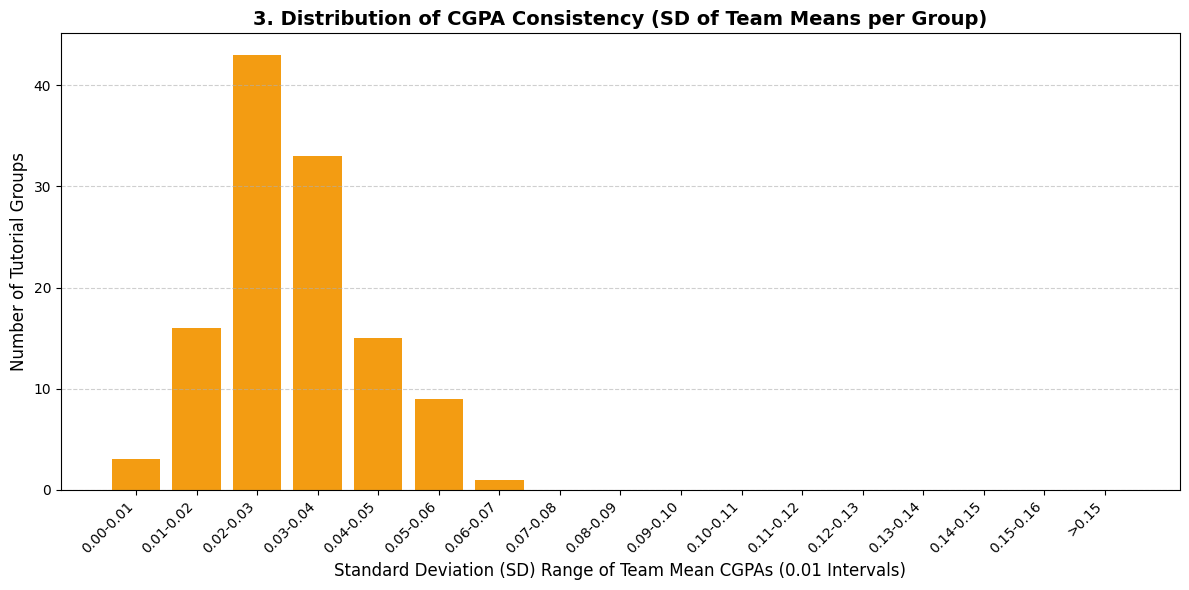

In [226]:
#Executable code:
plot_sd_distribution(sd_distribution_counts)

## **III. Challenges, issues and conclusion.**

### **1. Challenges and issues:**
During our process to solve this problem, we encountered a few challenges:
- To decide upon on the approach to allocating students: \
At first we decide to create a tree with the categories Male/Female + High/Low CGPA + STEM/nonSTEM nodes before directly allocating them. However, due to the difference in the characteristics of the 3 sorting criteria as show in I. Overview of the problem, we have to change our approach to prioritise allocating students by Gender and CGPA first, before rearranging to ensure school diversity.
- To sort students into groups that are gender-optimised: \
When we allocate students into groups of 5 in Part 3 based on gender and CGPA, we realised that we cannot make all groups to have a 3-2 gender configuration. Thus, we have to consider gender ratios and calculate explicitly the number of allocated groups with a 1-4 gender configuration in Step 2 and Step 3 of Part 3.
- To swap students to enhance school diversity: \
After that, it is also difficult to keep the CGPA and gender configurations unchanged when we try to enhance diversity when swapping schools. Some students cannot fit the CGPA and Gender criteria to swap, so there are still some groups with only 3 type of schools in the tutorial group. This is also a bit of an issue in this algorithm.

### **2. Conclusion:**
In this Jupyter Notebook we have successfully designed an algorithm to sort students into groups that maximises gender, CGPA, and school diversity, with only a $1.67 \%$ error in school diversity, a $2.17 \%$ error in gender diversity, and a maximum of $3.46 \%$ error in the allocated group's CGPA mean compared to the tutorial group's mean CGPA.

<img src="assets/Mini_Project_Requirements_Student_AY2526_AI_Declaration.jpg" width="1000" height="1500">